# Salary Prediction Project of US Baseball Major League Players with Four Different Models

In this project the below described data will be used to predict the salaries of baseball players. The data retrieved and downloaded from "https://www.kaggle.com"
    
    
### Description
    
#### Context

This dataset is part of the R-package ISLR and is used in the related book by G. James et al. (2013) "An Introduction to Statistical Learning with applications in R" to demonstrate how Ridge regression and the LASSO are performed using R.

#### Content
This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

#### Format

A data frame with 322 observations of major league players on the following 20 variables.

- AtBat Number of times at bat in 1986
- Hits Number of hits in 1986
- HmRun Number of home runs in 1986
- Runs Number of runs in 1986
- RBI Number of runs batted in in 1986
- Walks Number of walks in 1986
- Years Number of years in the major leagues
- CAtBat Number of times at bat during his career
- CHits Number of hits during his career
- CHmRun Number of home runs during his career
- CRuns Number of runs during his career
- CRBI Number of runs batted in during his career
- CWalks Number of walks during his career
- League A factor with levels A and N indicating player’s league at the end of 1986
- Division A factor with levels E and W indicating player’s division at the end of 1986
- PutOuts Number of put outs in 1986
- Assists Number of assists in 1986
- Errors Number of errors in 1986
- Salary 1987 annual salary on opening day in thousands of dollars
- NewLeague A factor with levels A and N indicating player’s league at the beginning of 1987

Acknowledgements
Please cite/acknowledge: Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York.
   


In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler


In [2]:
# Reading data

df = pd.read_csv('Hitters.csv')

### Understanding Data

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [6]:
df.shape

(322, 20)

In [7]:
# detecting missing values 

df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

Salary variable has 59 missing values

In [ ]:
#For visualizing missing values I need to install below package

conda install -c conda-forge/label/cf202003 missingno


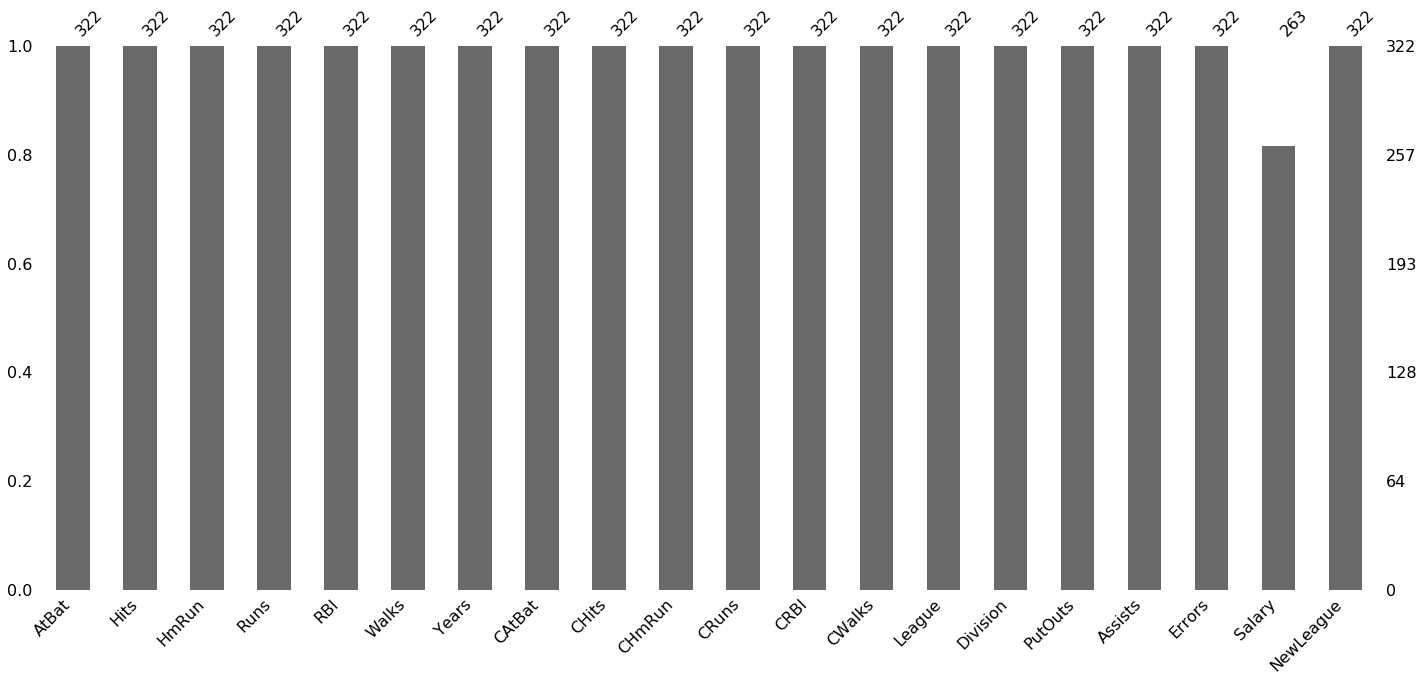

In [9]:
#Visualizing missing values

import missingno as msno
msno.bar(df);

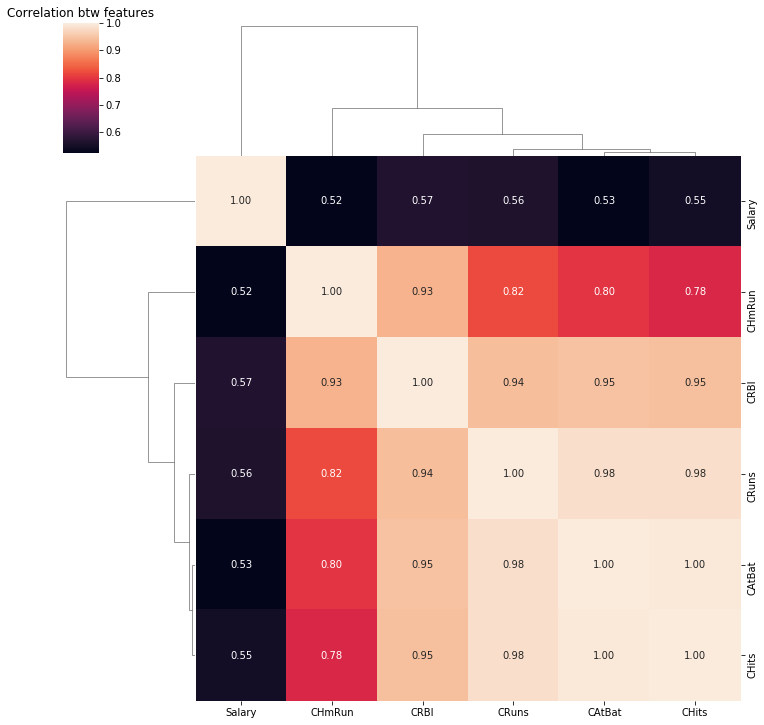

In [10]:
#Correlation values more than 0.5 between features (Because of >0.5 I can only see the values above 0.5)

correlation_matrix = df.corr().round(2)
filtre=np.abs(correlation_matrix['Salary'])>0.50
corr_features=correlation_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(),annot=True,fmt=".2f")
plt.title('Correlation btw features')
plt.show()

In [11]:
# Even though there are very high correlation between some of the variables I will not do anything. Normally this problem should be solved.
# Here I will delete missing values

df = df.dropna()

In [12]:
df.shape

(263, 20)

In [13]:
df.sort_values('Salary', ascending = False).head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,A,E,1045,88,13,2460.000,A
163,618,200,20,98,110,62,13,7127,2163,351,1104,1289,564,A,E,330,16,8,2412.500,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,A,E,1377,100,6,1975.000,A
229,514,144,0,67,54,79,9,4739,1169,13,583,374,528,N,E,229,453,15,1940.000,N


In [14]:
# I have 3 categoric variables

df['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [15]:
df['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [16]:
df['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [17]:
# Transforming nominal variables with one hot encoding method. Normally label encoding variable can be applied for dummy variables. One hot encoding is appropriate for the nominal variables have 3 or more categories 

df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)

In [18]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [19]:
# For detecting outliers I will use LocalOutlierFactor. I will use default values of 20 and 'auto'.

clf=LocalOutlierFactor(n_neighbors=20, contamination='auto')
clf.fit_predict(df)
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-6.22764656, -4.12325749, -3.14372723, -2.46482586, -2.37903838,
       -1.93271815, -1.92868899, -1.90888428, -1.6775256 , -1.66536304,
       -1.62626849, -1.48361164, -1.48216262, -1.44345727, -1.43603775,
       -1.42239393, -1.40734739, -1.38353101, -1.37252134, -1.3532077 ])

In [20]:
?LocalOutlierFactor

Init signature:
LocalOutlierFactor(
    n_neighbors=20,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto',
    novelty=False,
    n_jobs=None,
)
Docstring:     
Unsupervised Outlier Detection using Local Outlier Factor (LOF)

The anomaly score of each sample is called Local Outlier Factor.
It measures the local deviation of density of a given sample with
respect to its neighbors.
It is local in that the anomaly score depends on how isolated the object
is with respect to the surrounding neighborhood.
More precisely, locality is given by k-nearest neighbors, whose distance
is used to estimate the local density.
By comparing the local density of a sample to the local densities of
its neighbors, one can identify samples that have a substantially lower
density than their neighbors. These are considered outliers.

.. versionadded:: 0.19

Parameters
----------
n_neighbors : int, optional (default=20)
    Number of neighbo

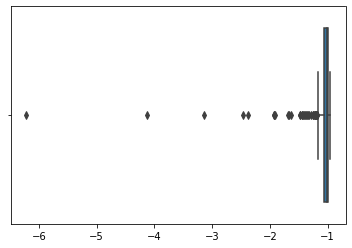

In [21]:
# I will take the 5th value as  threshold while the values after fift values decreasing closely
# However at first I will visualize this situation regarding outliers

sns.boxplot(df_scores);

In [22]:
threshold=np.sort(df_scores)[5]
print(threshold)
df = df.loc[df_scores > threshold]
df = df.reset_index(drop=True)

-1.9327181498464339


In [23]:
df.shape

(257, 20)

In [24]:
# Standardization
# I will make some operations at the below rows.
# Salary is my dependent variable, others are dummy variables. At first I will drop them from my independent variable set (X)
#At last I will combine all of the independent variables

df_X=df.drop(['Salary','League_N','Division_W','NewLeague_N'], axis=1)
df_X.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9
1,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19
2,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0
3,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22
4,202,53,4,31,26,27,9,1876,467,15,192,186,161,304,45,11


In [25]:
from sklearn.preprocessing import StandardScaler
scaled_cols=StandardScaler().fit_transform(df_X)



scaled_cols=pd.DataFrame(scaled_cols, columns=df_X.columns)
scaled_cols.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743
1,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756
2,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969
3,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660
4,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346


In [26]:
cat_df=df.loc[:, "League_N":"NewLeague_N"]
cat_df.head()

,League_N,Division_W,NewLeague_N
0,0,1,0
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1


In [27]:
Salary=pd.DataFrame(df['Salary'])

In [28]:
df=pd.concat([Salary,scaled_cols, cat_df], axis=1)
df.head()

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,100.000,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743,0,1,0
1,75.000,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756,1,1,1
2,1100.000,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969,0,0,0
3,517.143,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660,0,0,0
4,512.500,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346,1,1,1


In [29]:
# Dependent variable y = Salary, independents variables x = the variables without salary

y = df['Salary']
X = df.drop('Salary', axis =1)

In [30]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743,0,1,0
1,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756,1,1,1
2,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969,0,0,0
3,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660,0,0,0
4,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0.633171,0.425209,-0.530823,0.395278,-0.137681,-0.190552,-0.484287,0.019484,0.127999,-0.454429,0.051078,-0.060856,-0.464953,0.139585,-0.757017,-0.845065,1,0,1
253,0.599215,0.624906,-0.758763,0.825398,-0.060424,2.428014,0.979969,1.246844,1.214255,-0.369244,1.612808,0.371527,2.309574,0.096290,1.809706,1.744058,0,0,0
254,0.483764,0.403020,-0.986702,0.238871,-0.330826,0.498545,-0.275108,-0.418922,-0.446715,-0.758659,-0.437340,-0.734137,-0.434836,-0.899488,-0.039439,-0.235860,0,1,0
255,1.149305,0.802414,-0.302884,1.177315,0.325866,1.692978,0.143251,0.235845,0.206579,0.336572,0.325436,0.275785,0.265384,3.707790,0.084757,0.525647,0,0,0


In [31]:
y

0       100.000
1        75.000
2      1100.000
3       517.143
4       512.500
         ...   
252     700.000
253     875.000
254     385.000
255     960.000
256    1000.000
Name: Salary, Length: 257, dtype: float64

In [32]:
# We will evaluate our model results cccording to mean value of predicted variable (y) 

y.mean()

539.2295992217898

### MODELING

In [33]:
# Train and test separation process and determining train and test size
#Test size will be %20 of the data and random state will be 46 for all of the models in order to compare the models

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

### Linear Regression

In [34]:
linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_linreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_linreg_rmse

327.3400731081065

##### Prediction value (rmse) for linear regression model is 382.00085575367274. y.mean value is 538.2316872586872


### Ridge Regression

In [35]:
ridreg = Ridge()
model = ridreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
df_ridreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridreg_rmse 

315.2897647451716

### Lasso Regression

In [36]:
lasreg = Lasso()
model = lasreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_lasreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_lasreg_rmse

318.6803120461422

### Elastic Net Regression

In [37]:
enet = ElasticNet()
model = enet.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_rmse

302.78610988935907

In [38]:
# Four models' Root Mean Squared Errors (RMSE) 

def compML(df, y, alg):
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = alg.__name__
    print(model_name, "Model RMSE:", RMSE)

In [39]:
models = [LinearRegression, Ridge, Lasso, ElasticNet] 

In [40]:
for model in models:
    compML(df, 'Salary', model)

LinearRegression Model RMSE: 327.3400731081065
Ridge Model RMSE: 315.2897647451716
Lasso Model RMSE: 318.6803120461422
ElasticNet Model RMSE: 302.78610988935907


## Model Tuning

### Ridge Regression Model Tuning

In [41]:
# Hyper parameter optimization with cross validation function.
# We will try to tune the model by assigning new alpha values.
# Default alpha value is 1.0 in Ridge regression. We will try different values.
# The best fit alpha value or parameter will be employed in the final model

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridreg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridreg_cv.fit(X_train, y_train)
ridreg_cv.alpha_

#Final Model 

ridreg_tuned = Ridge(alpha = ridreg_cv.alpha_).fit(X_train,y_train)
y_pred = ridreg_tuned.predict(X_test)
df_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridge_tuned_rmse

326.8910525412715

### Lasso Regression Model Tuning

In [42]:
# Hyper parameter optimization with cross validation function.
# We will try to tune the model by assigning new alpha values.
# Default alpha value is 1.0 in Lasso regression. We will try different values.
# The best fit alpha value or parameter will be employed in the final model

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

# Final Model 

lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
df_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_lasso_tuned_rmse

323.42312458020353

In [43]:
?Lasso

Init signature:
Lasso(
    alpha=1.0,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, optional
    Constant that multiplies the L1 term. Defaults to 1.0.
    ``alpha = 0`` is equivalent to an ordinary least square, solved
    by the :class:`LinearRegression` object. For numerical
    reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
    Given this, you should use the :class:`LinearRegression` object.

fit_intercept

### Elastic Net Regression Regression Model Tuning

In [44]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read more i

In [45]:
# Hyper parameter optimization with cross validation function.
# We will try to tune the model by assigning new alpha values.
# Default alpha value is 1.0 and default l1_ratio is 0.5 in ElesticNet regression. We will try different values.
# The best fit  values or parameters will be employed in the final model


enet_params = {"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}
enet = ElasticNet()
enet_model = enet.fit(X_train,y_train)
enet_cv = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)
enet_cv.best_params_

#Final Model 

enet_tuned = ElasticNet(**enet_cv.best_params_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
df_enet_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_tuned_rmse 

295.9805666186622

### Comparable Results of Four Basic and Tuned Models

In [46]:

ComparableResults_df =pd.DataFrame({"LINEAR":[df_linreg_rmse],"RIDGE":[df_ridreg_rmse],"RIDGE TUNED":[df_ridge_tuned_rmse],
                             "LASSO":[df_lasreg_rmse],"LASSO TUNED":[df_lasso_tuned_rmse], 
                             "ELASTIC NET":[df_enet_rmse], "ELASTIC NET TUNED":[df_enet_tuned_rmse]})

ComparableResults_df


,LINEAR,RIDGE,RIDGE TUNED,LASSO,LASSO TUNED,ELASTIC NET,ELASTIC NET TUNED
0,327.340073,315.289765,326.891053,318.680312,323.423125,302.78611,295.980567




## Result

In this project, four different linear regression models were employed to predict salary of any US Major Baseball League player. By using Linear, Ridge, Lasso, and ElesticNet Regression Machine Learning Models the root mean squared errors (RMSE) values were calculated. The RMSE is a measure of the average deviation of the estimates from the observed values. Then, the RMSE values were tried to be deacreased with the help of hyperparameter optimizations. As result the lowest RMSE value (295.98) obtained from the tuned ElesticNet Regression model.  According to analyses and predictions results, tuned ElesticNet Regression model is the best model to predict a US Baseball Major League player's salary.